# Reminders

- Nov. 22 to 24: Module 7 Week 2 Tutorial Attendance
- **Thursday Nov. 23**: We will finish up whatever lecture material is left from today (if any). The rest of the time will be open office hours.  Come prepared with your questions about your project!
- Friday Nov. 24: ⚠️ [Project Milestone](https://canvas.ubc.ca/courses/106343/assignments/1425107)
  - There is no hard requirement to use all the columns within your data file. Use the columns you need to obtain the information for your project topic. 
- Monday Nov. 27:
  - Module 7 (HtDAP): Worksheet
  - Module 8: Pre-Lecture Assignment

## Next Week:
- Starting **next** week (Wednesday Nov. 29): Tutorial sessions will be open office hours, for project help

See your Canvas calendar (https://canvas.ubc.ca/calendar) for details.

---

# How to Design Analysis Programs (HtDAP)

The steps in the HtDAP recipe are: 
1. Planning
<ol style="list-style-type:lower-alpha">
    <li>✅ Plan input: Identify the information in the file your program will read.</li>
    <li>✅ Plan output: Write a description of what your program will produce.</li>
    <li>✅ Plan examples: Write or draw examples of what your program will produce.</li>
</ol>
2. Designing the program
<ol style="list-style-type:lower-alpha">
    <li>✅ Design data definitions.</li>
    <li>✅ Design read function: Design a function to read the information and store it as data in your program.</li>
    <li>▶️ Design analyze function: Design functions to analyze the data.</li>
</ol>

---

# Purpose
Given a type of crime, find the time of day (hour) with the highest frequency

### Step 2a: Building
#### Design data definitions

Before you design data definitions in the code cell below, you must explicitly document here which information in the file you chose to represent and why that information is crucial to the chart or graph that you'll produce when you complete step 2c. *Note: we'll skip the "chart or graph" part!*

<font color="blue">

<h2>Don't forget to fill this part in.</h2>

An example of something we might want to say here:

We are going to use the type (first column which is index 0) and hour (fifth column which is index 4) columns from the data file. As we are interested in the time of the day when a particular type of crime is most common, we need to store those two pieces of information. Hour is represented in 24 hour format so the values in this column go from 0 to 23.

</font>

In [2]:
from cs103 import *
from typing import NamedTuple, List
import csv

##################
# Data Definitions

from cs103 import *
from typing import NamedTuple, List
from enum import Enum
import csv

##################
# Data Definitions

# We generally use a threshold of about 15 to 17 values as the upper
# limit for Enum values. If you have more values than that, feel free
# to represent the data in another way (e.g., using simple atomic data
# types). In this case, we only have 4 crime types (or 11 if we 
# consider the full dataset so we can comfortably use an enum).

# You could have also abbreviated these names to something much shorter
# (but you would still need to clearly state what each enum value maps
# to in the dataset).

CrimeType = Enum('CrimeType', ["BNE_COMMERCIAL", "BNE_RESIDENTIAL", 
                               "THEFT_OF_BICYCLE", "THEFT_OF_VEHICLE"])
# interp. This is the type of crime, oe of break-and-enter of a commercial building
# (BNE_COMMERCIAL), break-and-enter of a residential (or other) building
# (BNE_RESIDENTIAL), theft of a vehicle (THEFT_OF_VEHICLE), or
# theft of a bicycle (THEFT_OF_BICYCLE)

# examples are redundant for enumerations

@typecheck
def fn_for_crime_type(ct: CrimeType) -> ...:
    # template from enumeration (4 fields)
    if ct == CrimeType.BNE_COMMERCIAL:
        return ...
    elif ct == CrimeType.BNE_RESIDENTIAL:
        return ...
    elif ct == CrimeType.THEFT_OF_BICYCLE:
        return ...
    elif ct == CrimeType.THEFT_OF_VEHICLE:
        return ...
    

CrimeData = NamedTuple('CrimeData', [('type', CrimeType),
                                    ('hour', int)]) # in range [0, 23]
# interp. the data about a single crime in Vancouver with the type of crime
# and the hour in which the VPD reported it
# (Caution: hours of 0 are sometimes intentionally inaccurate reports or placeholders)

CD1 = CrimeData(CrimeType.BNE_RESIDENTIAL, 11)
CD2 = CrimeData(CrimeType.THEFT_OF_BICYCLE, 23)

@typecheck
def fn_for_crime_data(cd: CrimeData) -> ...:
    # template based on compound (2 fields) and reference rule
    return ...(fn_type_crime_type(cd.type),
               cd.hour)


# List[CrimeData]
# interp. a list of crime data

LOCD0 = []
LOCD1 = [CD1, CD2]

@typecheck
def fn_for_locd(locd: List[CrimeData]) -> ...:
    # template based on arbitrary-sized data and reference rule
    # description of the accumulator
    acc = ...   # type: ...

    for cd in locd:
        acc = ...(fn_for_crime_data(cd), acc)

    return ...(acc)

In [3]:
# Here are some definitions we'll need later on that aren't particularly interesting to work on in class!

# List[str]
# interp. a list of strings
LOS0 = []
LOS1 = ['hello', 'world']

# template based on arbitrary-sized data
@typecheck
def fn_for_los(los: List[str]) -> ...:
    # description of accumulator
    acc = ... # type: ...
    
    for s in los:
        acc = ...(s, acc)
        
    return ...(acc)


# List[int]
# interp. a list of integers
LOI0 = []
LOI1 = [1, -12]

# template based on arbitrary-sized data
@typecheck
def fn_for_loi(loi: List[int]) -> ...:
    # description of accumulator
    acc = ... # type: ...
    
    for i in loi:
        acc = ...(i, acc)
        
    return ...(acc)

### Step 2b: Building
#### Design a function to read the information and store it as data in your program

### Appendix: Parsing `CrimeType` with `parse_crime_type`

Here's the helper function `parse_crime_type` to parse a string into a `CrimeType`.  It was designed using our good old HtDF recipe.  (The function wasn't designed in class because we're all familiar with the recipe by now 🙂  We just need to run this cell.)

Notice that this function takes a string as input, not a `CrimeType`.  (That's the *output*!)

In [4]:
@typecheck
def parse_crime_type(s:str) -> CrimeType:
    """
    Returns the string s as a CrimeType.
    
    Assumes s is one of the following:
        "Break and Enter Commercial"
        "Break and Enter Residential/Other"
        "Theft of Bicycle"
        "Theft of Vehicle"
    """
    # return CrimeType.BNE_COMMERCIAL # stub
    # template from atomic non-distinct
    # return ...(s)
    if s == "Break and Enter Commercial":
        return CrimeType.BNE_COMMERCIAL
    elif s == "Break and Enter Residential/Other":
        return CrimeType.BNE_RESIDENTIAL
    elif s == "Theft of Bicycle":
        return CrimeType.THEFT_OF_BICYCLE
    elif s == "Theft of Vehicle":
        return CrimeType.THEFT_OF_VEHICLE
    
    
start_testing()

expect(parse_crime_type("Break and Enter Commercial"), CrimeType.BNE_COMMERCIAL)
expect(parse_crime_type("Break and Enter Residential/Other"), CrimeType.BNE_RESIDENTIAL)
expect(parse_crime_type("Theft of Bicycle"), CrimeType.THEFT_OF_BICYCLE)
expect(parse_crime_type("Theft of Vehicle"), CrimeType.THEFT_OF_VEHICLE)

summary()

4 of 4 tests passed


In [5]:
@typecheck
def read(filename: str) -> List[CrimeData]:
    """    
    reads information from the specified file and returns a list of crime data
    """
    #return []  #stub
    # Template from HtDAP
    # locd contains the result so far
    locd = [] # type: List[CrimeData]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            # you may not need to store all the rows, and you may need
            # to convert some of the strings to other types
            
            # row[0] -> Type of crime (str)
            # row[4] -> Hour (str)
            if is_reliable(row):
                cd = CrimeData(parse_crime_type(row[0]), parse_int(row[4]))
                locd.append(cd)
    
    return locd


@typecheck
def is_reliable(row: List[str]) -> bool:
    """
    Returns True if the hour of the crime (row[4]) is non-zero.
    
    ASSUMES: row is a full row of values from a crime data information file.
    Specifically, row[4] must exist, be the hours, and be a string representation of an int.
    
    Hours of 0 are not reliable since they may simply indicate missing data.
    """
#     return True # stub
    # template treats row as atomic and uses indexing instead
    # return ...(row) # template
    return row[4] != "0"
    
    
######################
# Tests for read
######################
start_testing()

# Examples and tests for read
expect(read("test_empty"), [])
expect(read("test_small1"), [CrimeData(CrimeType.BNE_COMMERCIAL, 6)])
expect(read("test_small2.csv"), [CrimeData(CrimeType.BNE_COMMERCIAL, 6),
                                CrimeData(CrimeType.BNE_RESIDENTIAL, 9),
                                CrimeData(CrimeType.THEFT_OF_BICYCLE, 11),
                                CrimeData(CrimeType.THEFT_OF_VEHICLE, 15),
                                CrimeData(CrimeType.THEFT_OF_VEHICLE, 15),
                                CrimeData(CrimeType.THEFT_OF_VEHICLE, 16),
                                CrimeData(CrimeType.THEFT_OF_VEHICLE, 16),
                                CrimeData(CrimeType.BNE_RESIDENTIAL, 9),
                                CrimeData(CrimeType.BNE_RESIDENTIAL, 20)])

summary()

########################
# Tests for is_reliable
########################
start_testing()

expect(is_reliable(["Break and Enter Commercial","2018","3","2","6","17",
                    "10XX ALBERNI ST","West End","491058.8169","5459123.086"]), True)
expect(is_reliable(["Break and Enter Commercial","2018","3","2","0","17",
                    "10XX ALBERNI ST","West End","491058.8169","5459123.086"]), False)

summary()

3 of 3 tests passed
2 of 2 tests passed


### Step 2c: Building
#### Design functions to analyze the data

Complete these steps in the code cell below. You will likely want to rename the analyze function so that the function name describes what your analysis function does.


**NOTE:** To make this manageable in class, we will provide some finished helper functions.

### Appendix: Filtering List[CrimeData] for crimes of a particular type

In [6]:
@typecheck
def filter_for_crime_type(locd: List[CrimeData], crime_type: CrimeType) -> List[CrimeData]:
    """
    Filters locd to only keep crimes with type crime_type
    """
#     return [] # stub
    # template based on List[CrimeData] with additional parameter crime_type
    # the crimes seen so far that are of crime_type
    acc = [] # type: List[CrimeData]
    
    for cd in locd:
        # Why did we not make a is_crime_type(cd: CrimeData, ct: CrimeType) function?
        # It's because this function would fundamentally not do a whole lot other than
        # call the does_crime_type_match function.
        # We include the is_crime_type function for completeness below (but notice that
        # we don't actually invoke it anywhere).
        if does_crime_type_match(cd.type, crime_type):
            acc.append(cd)
        
    return acc
    
@typecheck
def is_crime_type(cd: CrimeData, crime_type: CrimeType) -> bool:
    """
    Returns True if the type of crime that cd is matches crime_type.
    """
#     return True # stub
    # template based on CrimeData with additional parameter crime_type
    return does_crime_type_match(cd.type, crime_type)

@typecheck
def does_crime_type_match(ct1: CrimeType, ct2: CrimeType) -> bool:
    """
    Returns True if ct1 is the same as ct2; False otherwise.
    """
#     return True # stub
    # template based on CrimeType (twice)
    if ct1 == CrimeType.BNE_COMMERCIAL:
        return ct2 == CrimeType.BNE_COMMERCIAL
    elif ct1 == CrimeType.BNE_RESIDENTIAL:
        return ct2 == CrimeType.BNE_RESIDENTIAL
    elif ct1 == CrimeType.THEFT_OF_BICYCLE:
        return ct2 == CrimeType.THEFT_OF_BICYCLE
    elif ct1 == CrimeType.THEFT_OF_VEHICLE:
        return ct2 == CrimeType.THEFT_OF_VEHICLE

##################################
# Tests for filter_for_crime_type
###################################
start_testing()

# Case 1: Empty list
expect(filter_for_crime_type([], CrimeType.BNE_COMMERCIAL), [])

# Case 2: List doesn't have our crime type of interest
expect(filter_for_crime_type([CrimeData(CrimeType.THEFT_OF_BICYCLE, 5)], CrimeType.BNE_COMMERCIAL), [])
expect(filter_for_crime_type([CrimeData(CrimeType.THEFT_OF_BICYCLE, 5), 
                             CrimeData(CrimeType.THEFT_OF_VEHICLE, 15),
                             CrimeData(CrimeType.BNE_RESIDENTIAL, 20)], CrimeType.BNE_COMMERCIAL), [])

# Case 3: List has some items of interest but not all the items are of interest
expect(filter_for_crime_type([CrimeData(CrimeType.THEFT_OF_BICYCLE, 2),
                             CrimeData(CrimeType.BNE_RESIDENTIAL, 16),
                             CrimeData(CrimeType.THEFT_OF_VEHICLE, 16)], CrimeType.THEFT_OF_VEHICLE), [CrimeData(CrimeType.THEFT_OF_VEHICLE, 16)])

expect(filter_for_crime_type([CrimeData(CrimeType.THEFT_OF_BICYCLE, 2),
                             CrimeData(CrimeType.BNE_RESIDENTIAL, 16),
                             CrimeData(CrimeType.THEFT_OF_VEHICLE, 16),
                             CrimeData(CrimeType.THEFT_OF_VEHICLE, 18),
                             CrimeData(CrimeType.THEFT_OF_VEHICLE, 4)], CrimeType.THEFT_OF_VEHICLE), 
       [CrimeData(CrimeType.THEFT_OF_VEHICLE, 16),
        CrimeData(CrimeType.THEFT_OF_VEHICLE, 18),
        CrimeData(CrimeType.THEFT_OF_VEHICLE, 4)])

# Case 4: All items in list are of interest
expect(filter_for_crime_type([CrimeData(CrimeType.THEFT_OF_VEHICLE, 16),
                             CrimeData(CrimeType.THEFT_OF_VEHICLE, 18),
                             CrimeData(CrimeType.THEFT_OF_VEHICLE, 4)], CrimeType.THEFT_OF_VEHICLE), 
       [CrimeData(CrimeType.THEFT_OF_VEHICLE, 16),
        CrimeData(CrimeType.THEFT_OF_VEHICLE, 18),
        CrimeData(CrimeType.THEFT_OF_VEHICLE, 4)])

summary()

##########################
# Tests for is_crime_type
##########################
start_testing()

expect(is_crime_type(CD1, CrimeType.BNE_COMMERCIAL), False)
expect(is_crime_type(CD1, CrimeType.BNE_RESIDENTIAL), True)

summary()

####################################
# Tests for does_crime_type_match
###################################
# In this case, we are taking advantage of the fact that CrimeType has very few Enum values so we have
# made tests to mock up every single possible way in which this function can be called. The benefit
# of this is this means we can be absolutely sure our function works as intended because we are testing
# everything.

# In your project, if you have a similar function that accepts multiple Enums and each of those Enums have
# many possible values, you do not need to make every single possible combination for your tests. You do,
# however, need to ensure that you have at least one test for each of your Enum values.
# For example, imagine if CrimeType had 11 possible values. At minimum, we would want 11 tests for the
# does_crime_type_match function.
start_testing()

expect(does_crime_type_match(CrimeType.BNE_COMMERCIAL, CrimeType.BNE_COMMERCIAL), True)
expect(does_crime_type_match(CrimeType.BNE_COMMERCIAL, CrimeType.BNE_RESIDENTIAL), False)
expect(does_crime_type_match(CrimeType.BNE_COMMERCIAL, CrimeType.THEFT_OF_VEHICLE), False)
expect(does_crime_type_match(CrimeType.BNE_COMMERCIAL, CrimeType.THEFT_OF_BICYCLE), False)

expect(does_crime_type_match(CrimeType.BNE_RESIDENTIAL, CrimeType.BNE_COMMERCIAL), False)
expect(does_crime_type_match(CrimeType.BNE_RESIDENTIAL, CrimeType.BNE_RESIDENTIAL), True)
expect(does_crime_type_match(CrimeType.BNE_RESIDENTIAL, CrimeType.THEFT_OF_VEHICLE), False)
expect(does_crime_type_match(CrimeType.BNE_RESIDENTIAL, CrimeType.THEFT_OF_BICYCLE), False)

expect(does_crime_type_match(CrimeType.THEFT_OF_VEHICLE, CrimeType.BNE_COMMERCIAL), False)
expect(does_crime_type_match(CrimeType.THEFT_OF_VEHICLE, CrimeType.BNE_RESIDENTIAL), False)
expect(does_crime_type_match(CrimeType.THEFT_OF_VEHICLE, CrimeType.THEFT_OF_VEHICLE), True)
expect(does_crime_type_match(CrimeType.THEFT_OF_VEHICLE, CrimeType.THEFT_OF_BICYCLE), False)

expect(does_crime_type_match(CrimeType.THEFT_OF_BICYCLE, CrimeType.BNE_COMMERCIAL), False)
expect(does_crime_type_match(CrimeType.THEFT_OF_BICYCLE, CrimeType.BNE_RESIDENTIAL), False)
expect(does_crime_type_match(CrimeType.THEFT_OF_BICYCLE, CrimeType.THEFT_OF_VEHICLE), False)
expect(does_crime_type_match(CrimeType.THEFT_OF_BICYCLE, CrimeType.THEFT_OF_BICYCLE), True)

summary()

6 of 6 tests passed
2 of 2 tests passed
16 of 16 tests passed


### Appendix: Determining if a crime happened at a particular hour

In [7]:
@typecheck
def is_at_hour(cd: CrimeData, hour: int) -> bool:
    """
    Returns True if cd happened at hour; False otherwise.
    """
#     return True # stub
    # template based on CrimeData with additional parameter hour
    return cd.hour == hour

start_testing()

expect(is_at_hour(CrimeData(CrimeType.BNE_COMMERCIAL, 4), 4), True)
expect(is_at_hour(CrimeData(CrimeType.BNE_COMMERCIAL, 4), 14), False)

summary()

2 of 2 tests passed


In [8]:
###########
# Functions

@typecheck
def main(filename: str, crime_type: CrimeType) -> int:
    """
    Reads the file from given filename, analyzes the data, returns the result 
    """
    # Template from HtDAP, based on function composition 
    return analyze(read(filename), crime_type) 
    
    
@typecheck
def analyze(locd: List[CrimeData], crime_type: CrimeType) -> int: 
    """ 
    Finds and returns the hour in which the most reports of crime_type have occurred 
    
    If locd is empty or does not contain CrimeData WITH crime _type, return 0.
    
    In the event of a tie, return the earlier hour
    """ 

    return 0 #stub
    
    #Template from composition
    #Step 1: filter locd based on crime_type
    filtered_locd = filtered_for_crime_type(locd,crime_type)
    
    #Step 2: take result of step 1 to find the time of day with the most crime
    popular_hour = find_popular_crime_time(filtered_locd)

@typecheck
def find_popular_crime_type(locd: List[CrimeData]) -> int:
    """
    Finds the hour with the most number of crimes. 
    
    If locd is empty, return 0.
    
    If there is a tie, return the earliest hour.
    """
    
#    return 0 #stub
    #template from List[int]
    hours = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
    #Things to consider:
    #1: What template comment should you be using? (What are you basing the
    #skeleton of your code on? List[CrimeData] or List[int]?)
    #2: What are the steps? Sometimes it helps to sketch out your process in English first
        #E.g., For each hour, I want to find the number of crimes that happened at <hour>
        #Then I need to compare this against...?
    #3: (When you are finished with implementation and testing) Are there any other ways
    # you could have solved this problem? Try it out (it's great practice for the final)
    
    hour_with_most_crime = 0
    highest_number_of_crimes_seen_so_far = 0
    for h in hours:
        #TODO find the frequency of crime given locd and h
        num_crimes_per_hour = find_num_crimes_per_hour(locd,h)
        
        if num_crimes_per_hour > highest_number_of_crimes_seen_so_far:
            highest_number_of_crimes_seen_so_far = num_crimes_per_hour
            hour_with_most_crime = h
    return hour_with_most_crime

@typecheck
def find_num_crimes_per_hour(locd: List[CrimeData], hour: int) -> int:
    """
    Returns the number of crimes that happened during hour based on locd
    """
    return 0 #stub
# Examples and tests for main
start_testing()

#Test 1: Testing to see nothing breaks when the file is empty
expect(main("test_empty", CrimeType.THEFT_OF_BICYCLE),0)

#Test 2: Testing what happens when there is data in the file but the data isn't what we are interested in
expect(main("test_small1", CrimeType.THEFT_OF_BICYCLE),0)

#Test 3: Test what happens when there is data in the file AND the data is what we are interested in

expect(main("test_small2.csv", CrimeType.THEFT_OF_BICYCLE),11)
expect(main("test_small2.csv", CrimeType.BNE_RESIDENTIAL),9)

#Test 4: Test what happens when there is data in the file, there is data of the type of interest,
#AND there is a tie

expect(main("test_small2.csv", CrimeType.THEFT_OF_VEHICLE),15)
summary()


# Examples and tests for analyze 
start_testing()

#Test 1: locd is empty -> what should you return? What does your purpose say?
expect(analyze([], CrimeType.THEFT_OF_VEHICLE),0)

#Test 2: locd has values but nothing with your crime type of interest
expect(analyze([CrimeData(CrimeType.BNE_RESIDENTIAL, 12)], CrimeType.THEFT_OF_VEHICLE),0)

#Test 3: locd has values AND it has something with your crime type of interest
#Test 4: Tie Case

#Do these test cases look familiar?
expect(..., ...) 

summary()


Test failed: expected 11 but got 0
    Line 82: expect(main("test_small2.csv", CrimeType.THEFT_OF_BICYCLE),11)
Test failed: expected 9 but got 0
    Line 83: expect(main("test_small2.csv", CrimeType.BNE_RESIDENTIAL),9)
Test failed: expected 15 but got 0
    Line 88: expect(main("test_small2.csv", CrimeType.THEFT_OF_VEHICLE),15)
2 of 5 tests passed
3 of 3 tests passed


<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Sample solution (For later.  Don't peek if you want to learn 🙂)</summary>
    
```python
###########
# Functions

# main is very special function name. It indicates that this is function you can call to
# make everything work. You don't need to know anything else about the functions
# in this program. In this case here, main takes care of calling read and analyze in the 
# right order so that our program can work right away. Anyone new to our program can run
# main without having to first determine the purpose of each function and how they should
# fit together.
# You will often need additional parameters for the main function.
# In this case here, if you aren't told what crime type you are interested in, 
# you will never know what the program should do. As this is information you cannot
# derive, you should ask for it as a parameter.
@typecheck
def main(filename: str, crime_type: CrimeType) -> int:
    """
    Reads the crime data file from the given filename and returns the hour (24 hour format)
    in which the most reports occurred for the given crime type.
    
    If there is no data for crime_type, return 0.
    
    In the case of ties, return the earlier tied hour.
    """
    # Template from HtDAP, based on function composition 
    return analyze(read(filename), crime_type) 
    
    
@typecheck
def analyze(locd: List[CrimeData], crime_type: CrimeType) -> int: 
    """ 
    Finds and returns the hour in which the most reports of type crime_type have occurred. 
    
    If there is no data for crime_type, return 0.
    
    In the case of ties, return the earlier tied hour.
    """ 

#     return 0 # stub

    # template from composition
    
    # Step 1: Filter locd to only crimes of crime_type.
    only_crimes_of_crime_type = filter_for_crime_type(locd, crime_type)
    
    # Step 2: Take the result from step 1 and find the number of crimes per hour.
    #         Find the hour with the most crime.
    #         (We may need to break this down further.)
    popular_hour = find_popular_crime_time(only_crimes_of_crime_type)
    
    # Step 3: Return the result from step 2.
    return popular_hour
    
@typecheck
def find_popular_crime_time(locd: List[CrimeData]) -> int:
    """
    Finds the hour with the most number of crimes.
    
    If locd is empty, return 0.
    
    If there is a tie, return the earliest hour.
    """
#     return 0 # stub
    hours = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19 ,20, 21, 22, 23]
    
    # max_hour is the time when the highest number of crimes (so far) has occurred
    max_hour = 0 # type: int
    
    # max_num_crimes is the highest number of crimes seen so far
    max_num_crimes = 0 # type: int
    
    for hour in hours:
        # I need some way to figure out how many crimes have happened in hour given locd
        num_crimes_during_hour = find_num_crimes(locd, hour)
        
        if max_num_crimes < num_crimes_during_hour:
            max_hour = hour
            max_num_crimes = num_crimes_during_hour
        
    return max_hour
    

@typecheck
def find_num_crimes(locd: List[CrimeData], hour: int) -> int:
    """
    Returns the number of crimes from locd that have happened in a given hour.
    """
#     return 0 # stub
    # template based on List[CrimeData] with additional parameter hour
    # num_crimes stores the number of crimes seen so far that have happened at hour
    num_crimes = 0 # type: int
    
    for cd in locd:
        if is_at_hour(cd, hour):
            num_crimes += 1 # num_crimes = num_crimes + 1
        
    return num_crimes


####################
# Tests for main
####################
start_testing()

# Examples and tests for main
expect(main("test_empty.csv", CrimeType.BNE_RESIDENTIAL), 0)

expect(main("test_small1.csv", CrimeType.BNE_COMMERCIAL), 6)
expect(main("test_small1.csv", CrimeType.BNE_RESIDENTIAL), 0)
expect(main("test_small1.csv", CrimeType.THEFT_OF_BICYCLE), 0)
expect(main("test_small1.csv", CrimeType.THEFT_OF_VEHICLE), 0)

expect(main("test_small2.csv", CrimeType.BNE_COMMERCIAL), 6)
expect(main("test_small2.csv", CrimeType.BNE_RESIDENTIAL), 9)
expect(main("test_small2.csv", CrimeType.THEFT_OF_BICYCLE), 11)
expect(main("test_small2.csv", CrimeType.THEFT_OF_VEHICLE), 15)

summary()


####################
# Tests for analyze
####################
start_testing()

# Examples and tests for analyze 

# Case 1: locd is an empty list
expect(analyze([], CrimeType.THEFT_OF_VEHICLE), 0)

# Case 2: locd has values but nothing with the crime type of interest
expect(analyze([CrimeData(CrimeType.BNE_RESIDENTIAL, 12)], CrimeType.THEFT_OF_VEHICLE), 0)
expect(analyze([CrimeData(CrimeType.BNE_RESIDENTIAL, 12), CrimeData(CrimeType.BNE_COMMERCIAL, 15), CrimeData(CrimeType.THEFT_OF_BICYCLE, 9)], CrimeType.THEFT_OF_VEHICLE), 0)

# Case 3: locd is not empty AND contains the crime type we are interested in
expect(analyze([CrimeData(CrimeType.THEFT_OF_BICYCLE, 1)], CrimeType.THEFT_OF_BICYCLE), 1)
expect(analyze([CrimeData(CrimeType.THEFT_OF_VEHICLE, 1), CrimeData(CrimeType.BNE_COMMERCIAL, 1), 
                CrimeData(CrimeType.BNE_COMMERCIAL, 2)], CrimeType.THEFT_OF_VEHICLE), 1)
expect(analyze([CrimeData(CrimeType.BNE_COMMERCIAL, 1), CrimeData(CrimeType.THEFT_OF_VEHICLE, 1), 
                CrimeData(CrimeType.BNE_COMMERCIAL, 2)], CrimeType.THEFT_OF_VEHICLE), 1) # Just wanted to make sure we are not always returning the first item in the list

expect(analyze([CrimeData(CrimeType.THEFT_OF_VEHICLE, 1), CrimeData(CrimeType.THEFT_OF_VEHICLE, 1), 
                CrimeData(CrimeType.BNE_COMMERCIAL, 2)], CrimeType.BNE_COMMERCIAL), 2)

# Case 4: locd has crime data of the type we are interested in and there is a tie for most popular time (times are nicely organized)
expect(analyze([CrimeData(CrimeType.THEFT_OF_VEHICLE, 1), CrimeData(CrimeType.THEFT_OF_VEHICLE, 1), 
                CrimeData(CrimeType.THEFT_OF_VEHICLE, 2), CrimeData(CrimeType.THEFT_OF_VEHICLE, 2)], 
               CrimeType.THEFT_OF_VEHICLE), 1)

# Case 5: locd has crime data of the type we are interested in and there is a tie for most popular time (times are scrambled)
expect(analyze([CrimeData(CrimeType.THEFT_OF_VEHICLE, 2), CrimeData(CrimeType.THEFT_OF_VEHICLE, 1), 
                CrimeData(CrimeType.THEFT_OF_VEHICLE, 1), CrimeData(CrimeType.THEFT_OF_VEHICLE, 3), 
                CrimeData(CrimeType.THEFT_OF_VEHICLE, 2)], 
               CrimeType.THEFT_OF_VEHICLE), 1)

summary()


####################################
# Tests for find_popular_crime_time
####################################
start_testing()

# Case 1: Empty list
expect(find_popular_crime_time([]), 0)

# Case 2: There is a clear answer to the most popular time
expect(find_popular_crime_time([CrimeData(CrimeType.THEFT_OF_BICYCLE, 1)]), 1)

expect(find_popular_crime_time([CrimeData(CrimeType.THEFT_OF_BICYCLE, 1),
                                CrimeData(CrimeType.THEFT_OF_VEHICLE, 2),
                                CrimeData(CrimeType.THEFT_OF_VEHICLE, 2),
                                CrimeData(CrimeType.THEFT_OF_BICYCLE, 2),
                                CrimeData(CrimeType.BNE_COMMERCIAL, 2),
                                CrimeData(CrimeType.BNE_COMMERCIAL, 2),
                                CrimeData(CrimeType.BNE_COMMERCIAL, 3),
                                CrimeData(CrimeType.THEFT_OF_VEHICLE, 2),
                                CrimeData(CrimeType.THEFT_OF_BICYCLE, 2),
                                CrimeData(CrimeType.BNE_RESIDENTIAL, 4)]), 2)

# Case 3: Ties (data organized nicely)
expect(find_popular_crime_time([CrimeData(CrimeType.THEFT_OF_BICYCLE, 1),
                                CrimeData(CrimeType.THEFT_OF_VEHICLE, 1),
                                CrimeData(CrimeType.THEFT_OF_VEHICLE, 1),
                                CrimeData(CrimeType.THEFT_OF_BICYCLE, 2),
                                CrimeData(CrimeType.BNE_COMMERCIAL, 2),
                                CrimeData(CrimeType.BNE_COMMERCIAL, 2),
                                CrimeData(CrimeType.BNE_COMMERCIAL, 3),
                                CrimeData(CrimeType.THEFT_OF_VEHICLE, 3),
                                CrimeData(CrimeType.THEFT_OF_BICYCLE, 4),
                                CrimeData(CrimeType.BNE_RESIDENTIAL, 4)]), 1)

# Case 4: Ties (data scrambled)
expect(find_popular_crime_time([CrimeData(CrimeType.THEFT_OF_BICYCLE, 1),
                                CrimeData(CrimeType.THEFT_OF_VEHICLE, 3),
                                CrimeData(CrimeType.THEFT_OF_VEHICLE, 1),
                                CrimeData(CrimeType.THEFT_OF_BICYCLE, 2),
                                CrimeData(CrimeType.BNE_COMMERCIAL, 2),
                                CrimeData(CrimeType.BNE_COMMERCIAL, 3),
                                CrimeData(CrimeType.THEFT_OF_BICYCLE, 4),
                                CrimeData(CrimeType.THEFT_OF_VEHICLE, 1),
                                CrimeData(CrimeType.BNE_COMMERCIAL, 2),
                                CrimeData(CrimeType.BNE_RESIDENTIAL, 4)]), 1)

summary()


#############################
# Tests for find_num_crimes
#############################
# Notice how tests for this function do not necessarily need to
# use lists where all the crimes are the same type.
# When possible, helpers should be treated as independent functions.
# Based on the desired functionality, there is no good reason 
# to restrict this helper to only working with lists of a certain 
# crime type.
start_testing()

# Case 1: Empty list
expect(find_num_crimes([], 1), 0)

# Case 2: List has something but nothing with the time you are interested in
expect(find_num_crimes([CrimeData(CrimeType.THEFT_OF_BICYCLE, 1),
                              CrimeData(CrimeType.THEFT_OF_VEHICLE, 2),
                              CrimeData(CrimeType.BNE_COMMERCIAL, 3),
                              CrimeData(CrimeType.BNE_RESIDENTIAL, 4)], 
                             5), 0)


# Case 3: List has something AND one of those things is the time you are interested in
expect(find_num_crimes([CrimeData(CrimeType.THEFT_OF_BICYCLE, 1),
                              CrimeData(CrimeType.THEFT_OF_VEHICLE, 2),
                              CrimeData(CrimeType.BNE_COMMERCIAL, 3),
                              CrimeData(CrimeType.BNE_RESIDENTIAL, 4)], 
                             4), 
       1)

# Case 4: List has something AND multiple things are the time you are interested in
expect(find_num_crimes([CrimeData(CrimeType.THEFT_OF_BICYCLE, 1),
                              CrimeData(CrimeType.BNE_RESIDENTIAL, 2),
                              CrimeData(CrimeType.THEFT_OF_VEHICLE, 2),
                              CrimeData(CrimeType.BNE_COMMERCIAL, 3),
                              CrimeData(CrimeType.BNE_RESIDENTIAL, 4)], 
                             2), 2)

expect(find_num_crimes([CrimeData(CrimeType.THEFT_OF_BICYCLE, 1),
                              CrimeData(CrimeType.BNE_RESIDENTIAL, 2),
                              CrimeData(CrimeType.BNE_COMMERCIAL, 3),
                              CrimeData(CrimeType.BNE_RESIDENTIAL, 4),
                               CrimeData(CrimeType.THEFT_OF_VEHICLE, 2)], 
                             2), 2)

# Case 5: List has something AND all the things are the time you are interested in
expect(find_num_crimes([CrimeData(CrimeType.THEFT_OF_BICYCLE, 2),
                              CrimeData(CrimeType.BNE_RESIDENTIAL, 2),
                              CrimeData(CrimeType.BNE_COMMERCIAL, 2),
                              CrimeData(CrimeType.BNE_RESIDENTIAL, 2),
                               CrimeData(CrimeType.THEFT_OF_VEHICLE, 2)], 
                             2), 5)

summary()
```
    
</details>

# Putting It Together

Recall that our purpose was:
> Given a type of crime, find the time of day (hour) with the highest frequency

In order to actually solve this problem, let's call the main function.

In [9]:
 main('crimedata_subset_bne_theft_of_bike_veh_2018.csv', CrimeType.BNE_COMMERCIAL)

0

In [10]:
 main('crimedata_subset_bne_theft_of_bike_veh_2018.csv', CrimeType.BNE_RESIDENTIAL)

0

In [11]:
 main('crimedata_subset_bne_theft_of_bike_veh_2018.csv', CrimeType.THEFT_OF_BICYCLE)

0

In [12]:
 main('crimedata_subset_bne_theft_of_bike_veh_2018.csv', CrimeType.THEFT_OF_VEHICLE)

0

# [Optional] Looking Ahead
When we cover module 8, we'll revisit these functions to see how we can create a line graph that looks similar to 
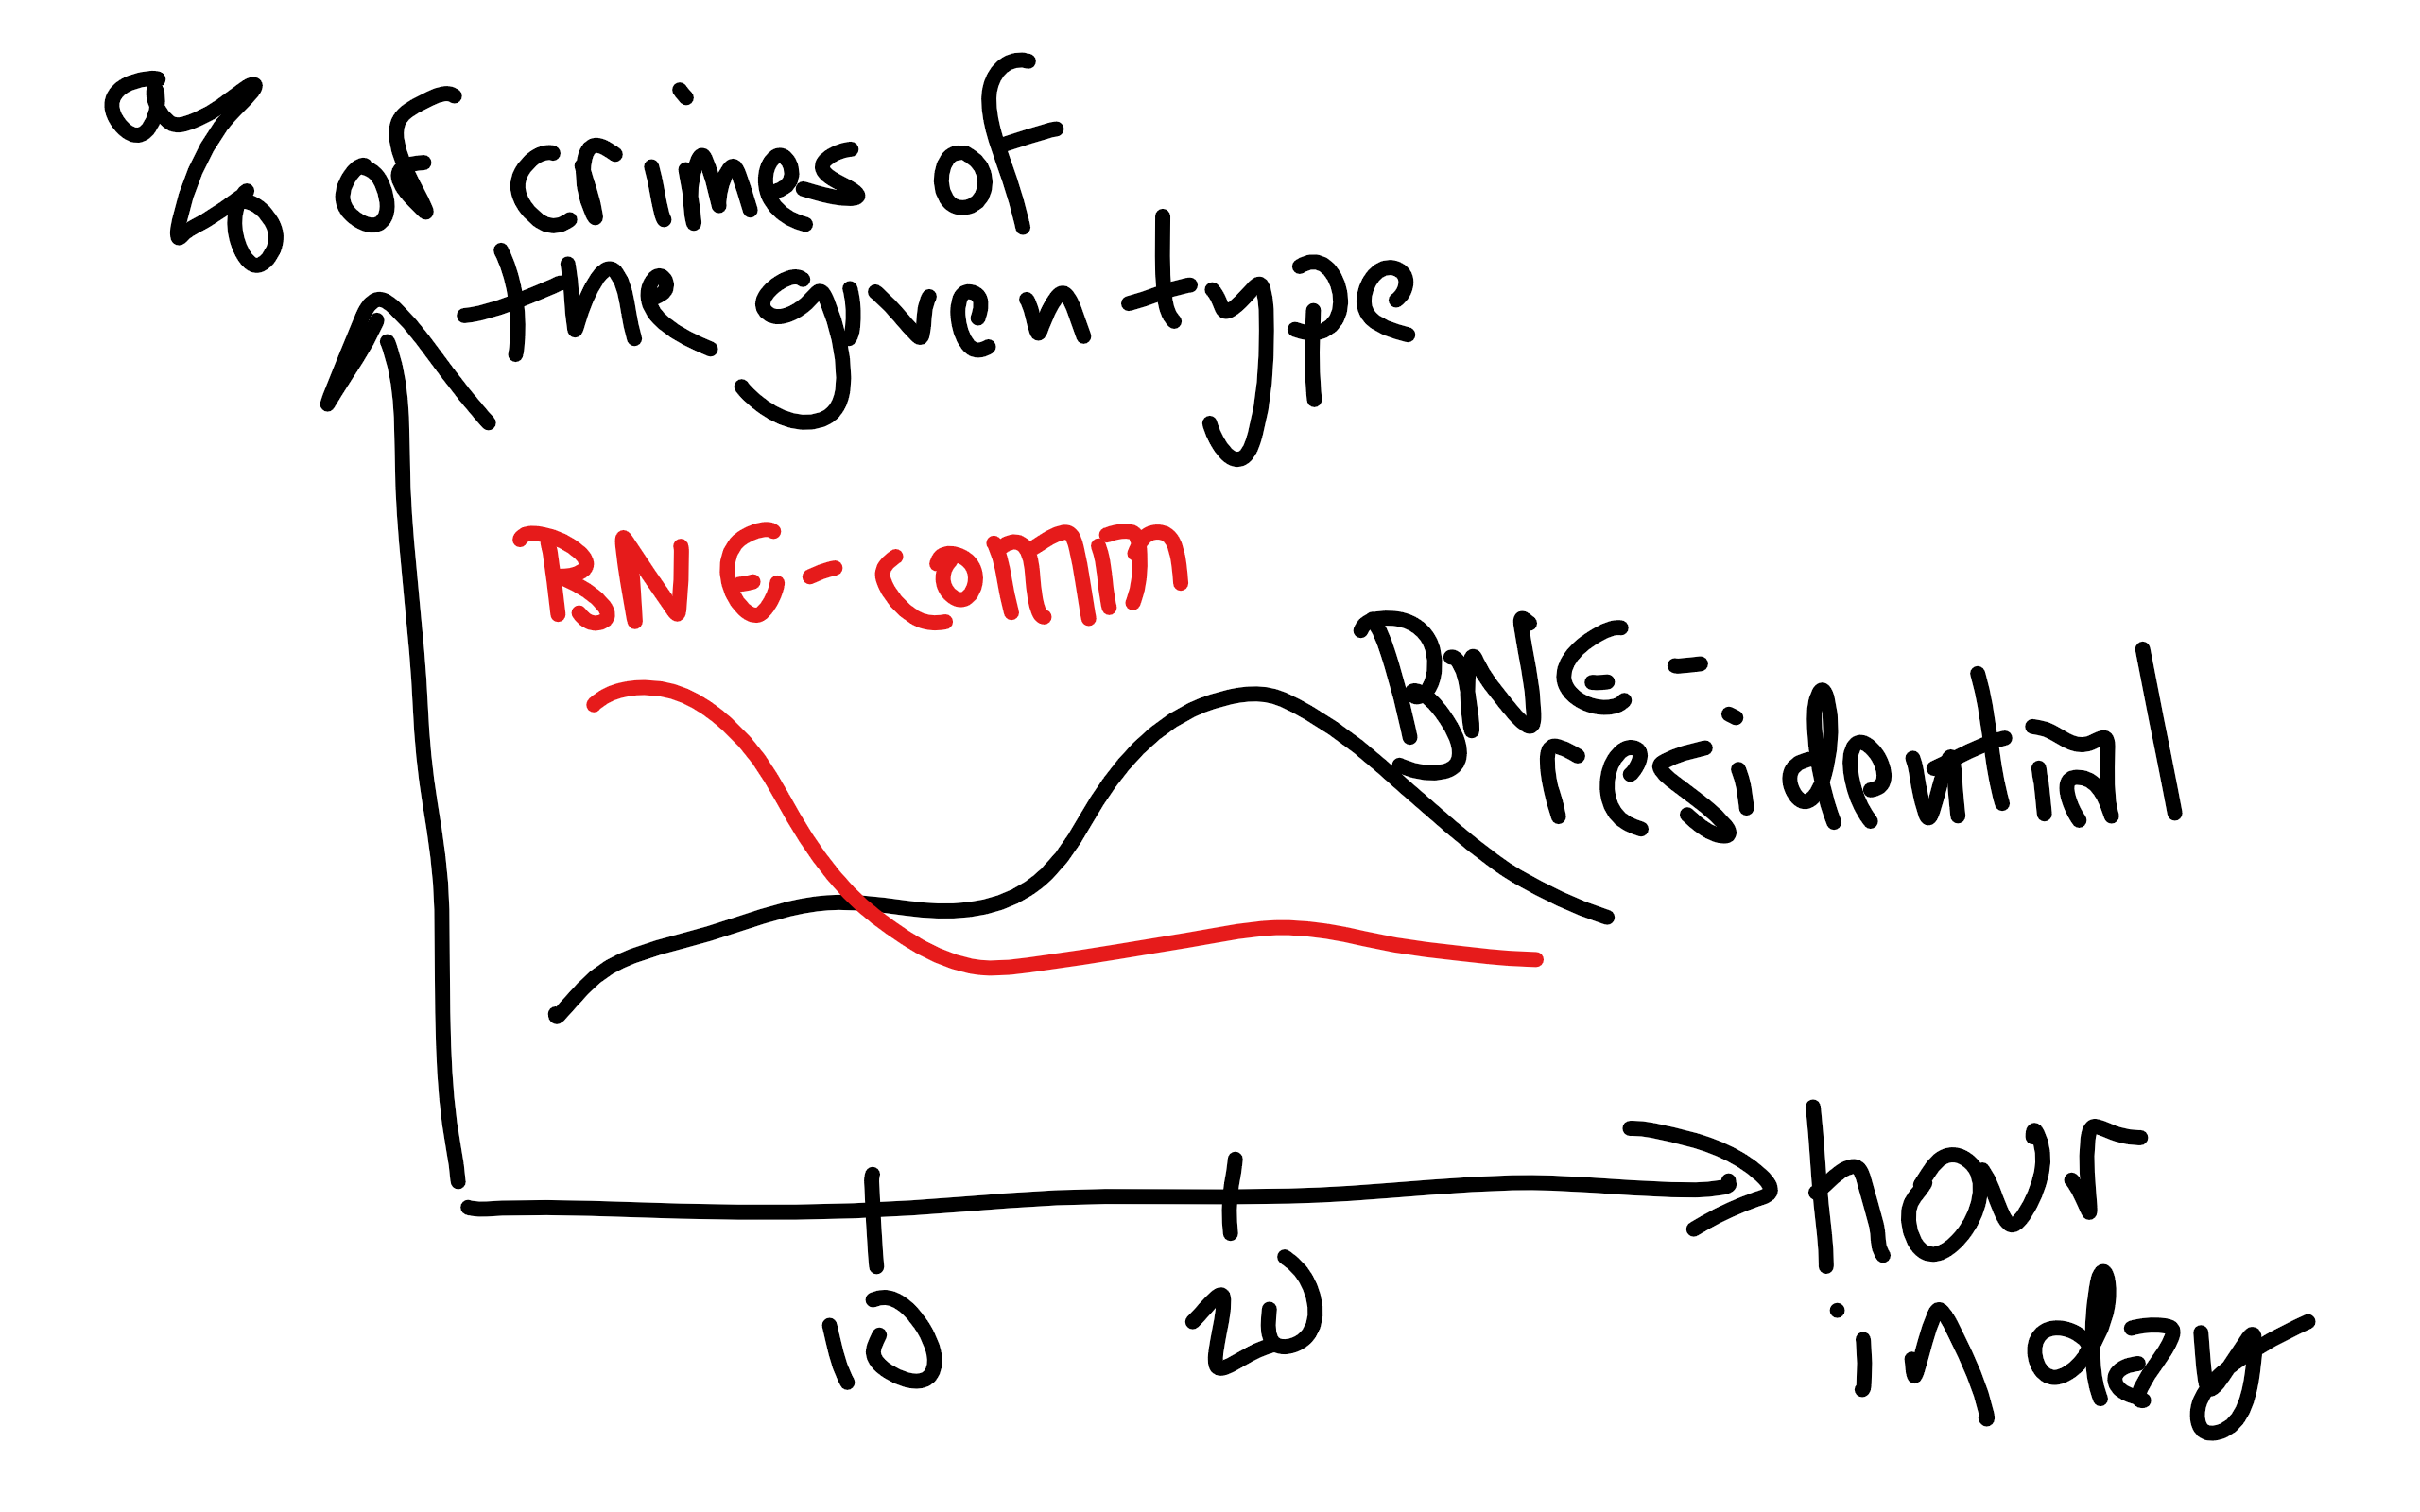.

If you want to look ahead, please refer to the line graph worked example in module 8. If you are feeling overwhelmed or you just don't want to look ahead yet, forget about this for now and we'll see you for lecture next week. Don't forget Thursday's lecture will be office hours!